In [1]:
from datetime import datetime as dt
from typing import Dict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

COLORS_7 = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']

from analsis.analsis_utils.plot_utils import plot_all_num_features_models, \
    plot_loss_and_r2s_for_selected_feature_numbers, \
    plot_num_features_vs_r2, plot_bar_plot_of_used_features, plot_r2_vs_num_features, \
    plot_double_bar_plot_of_used_features_different_algos
from analsis.analsis_utils.utils import get_all_num_features_results


In [2]:
exp_name = 'exp_2023-04-25-13-56-23'
base_path = '/Volumes/noamaz/modularity'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

used_features_csv_path_retina_lighgbm = f"{base_path}/teach_archs/retina/retina_lightgbm_feature_selection/exp_2023-04-25-12-22-31/2023-04-25-12-22-31_used_features.csv"
used_features_csv_path_retina_xgboost = f"{base_path}/teach_archs/retina/retina_xgboost_feature_selection/exp_2023-04-29-16-49-26/2023-04-29-16-49-26_used_features.csv"
used_features_csv_path_xor_lighgbm = f"{base_path}/teach_archs/xors/xor_lightgbm_feature_selection/exp_2023-04-25-13-56-23/2023-04-25-13-56-23_used_features.csv"
used_features_csv_path_xor_xgboost = f"{base_path}/teach_archs/xors/xor_xgboost_feature_selection/exp_2023-05-01-13-20-50/2023-05-01-13-20-50_used_features.csv"

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
fig_out_folder = "feature_selection_combined"
lr = 0.001

In [37]:
task = 'retina'
used_features_retina_lighgbm_df = pd.read_csv(used_features_csv_path_retina_lighgbm).drop("Unnamed: 0", axis=1).rename(columns={'connectivity_ratio': 'density'})
sum_uses_retina_lighgbm = used_features_retina_lighgbm_df.sum().sort_index().sort_values(ascending=False).rename('lighgbm')
used_features_retina_xgboost_df = pd.read_csv(used_features_csv_path_retina_xgboost).drop("Unnamed: 0", axis=1).rename(columns={'connectivity_ratio': 'density'})
sum_uses_retina_xgboost = used_features_retina_xgboost_df.sum().sort_index().sort_values(ascending=False).rename('xgboost')

,4
modularity,1
entropy,1
normed_entropy,1
density,1
num_connections,0
...,...
num_involved_neurons_in_paths_per_input_neuron_(0_1),0
num_involved_neurons_in_paths_per_input_neuron_(0_2),1
num_involved_neurons_in_paths_per_input_neuron_(0_3),1
num_involved_neurons_in_paths_per_input_neuron_(0_4),0


In [5]:
all_retina = pd.concat([sum_uses_retina_lighgbm, sum_uses_retina_xgboost], axis=1)
all_retina['sum'] = all_retina.sum(axis=1).sort_index()
all_retina = all_retina.sort_values('sum', ascending=False)

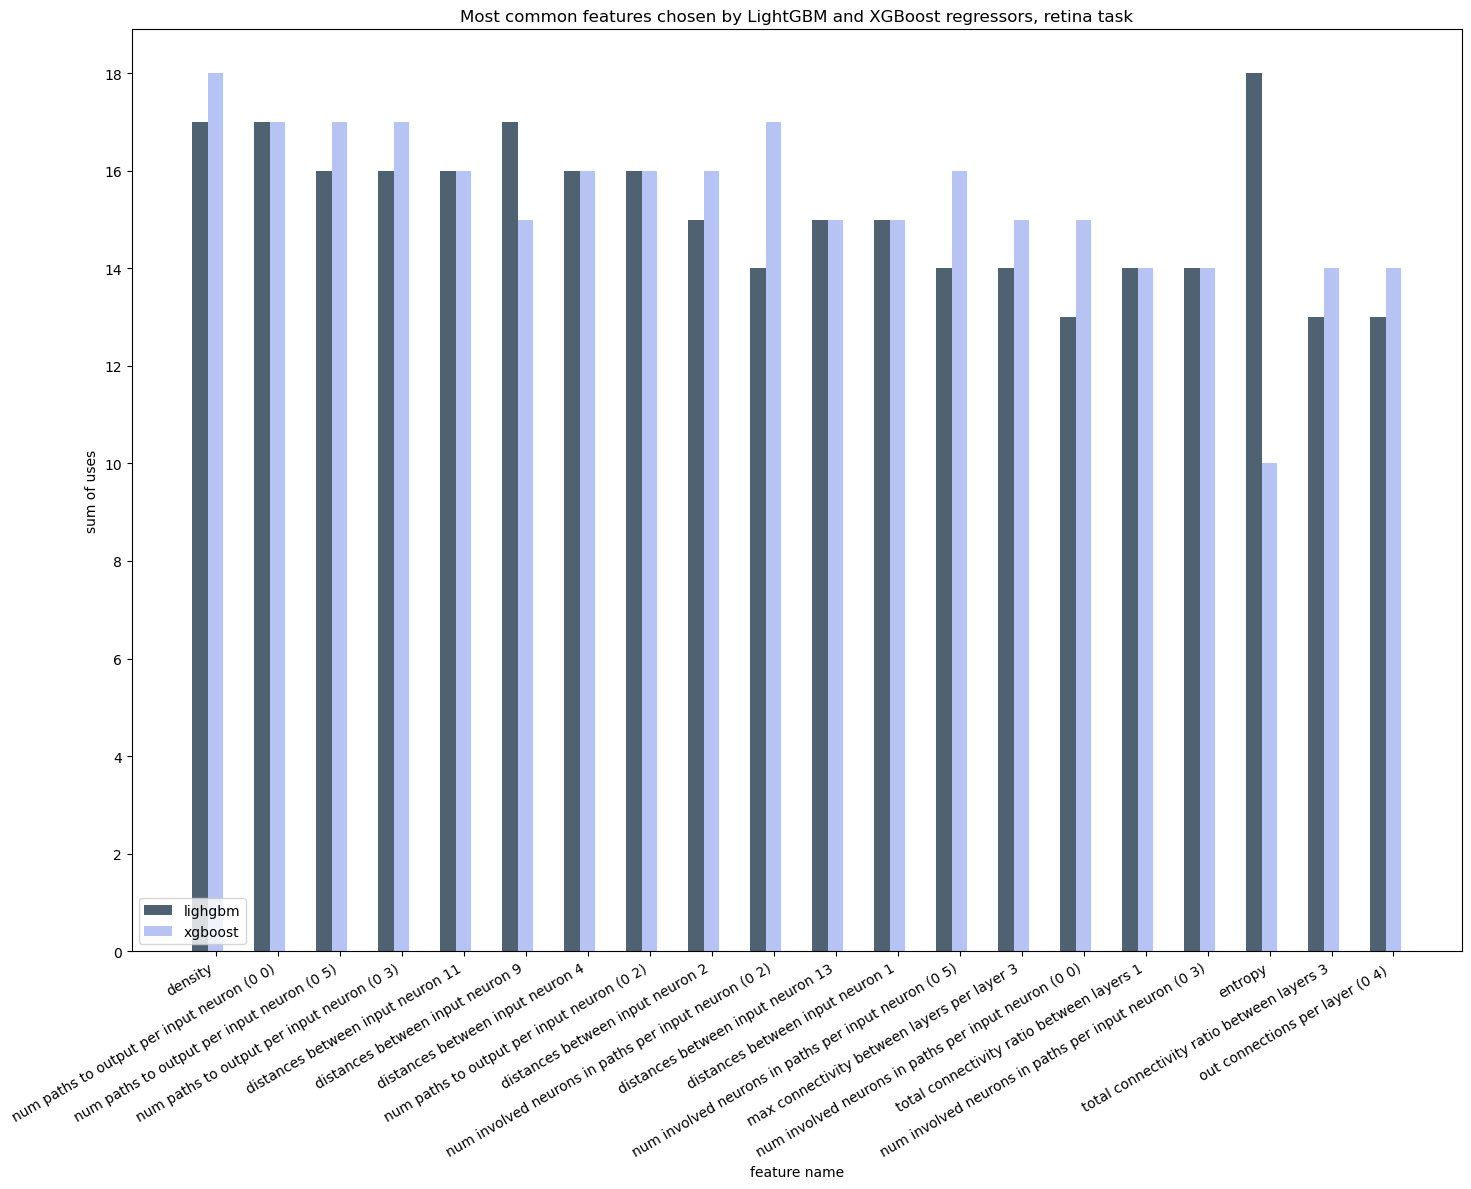

In [21]:
plot_double_bar_plot_of_used_features_different_algos(
    sum_uses=all_retina,
    cut=20,
    is_top=True,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task=task,
)

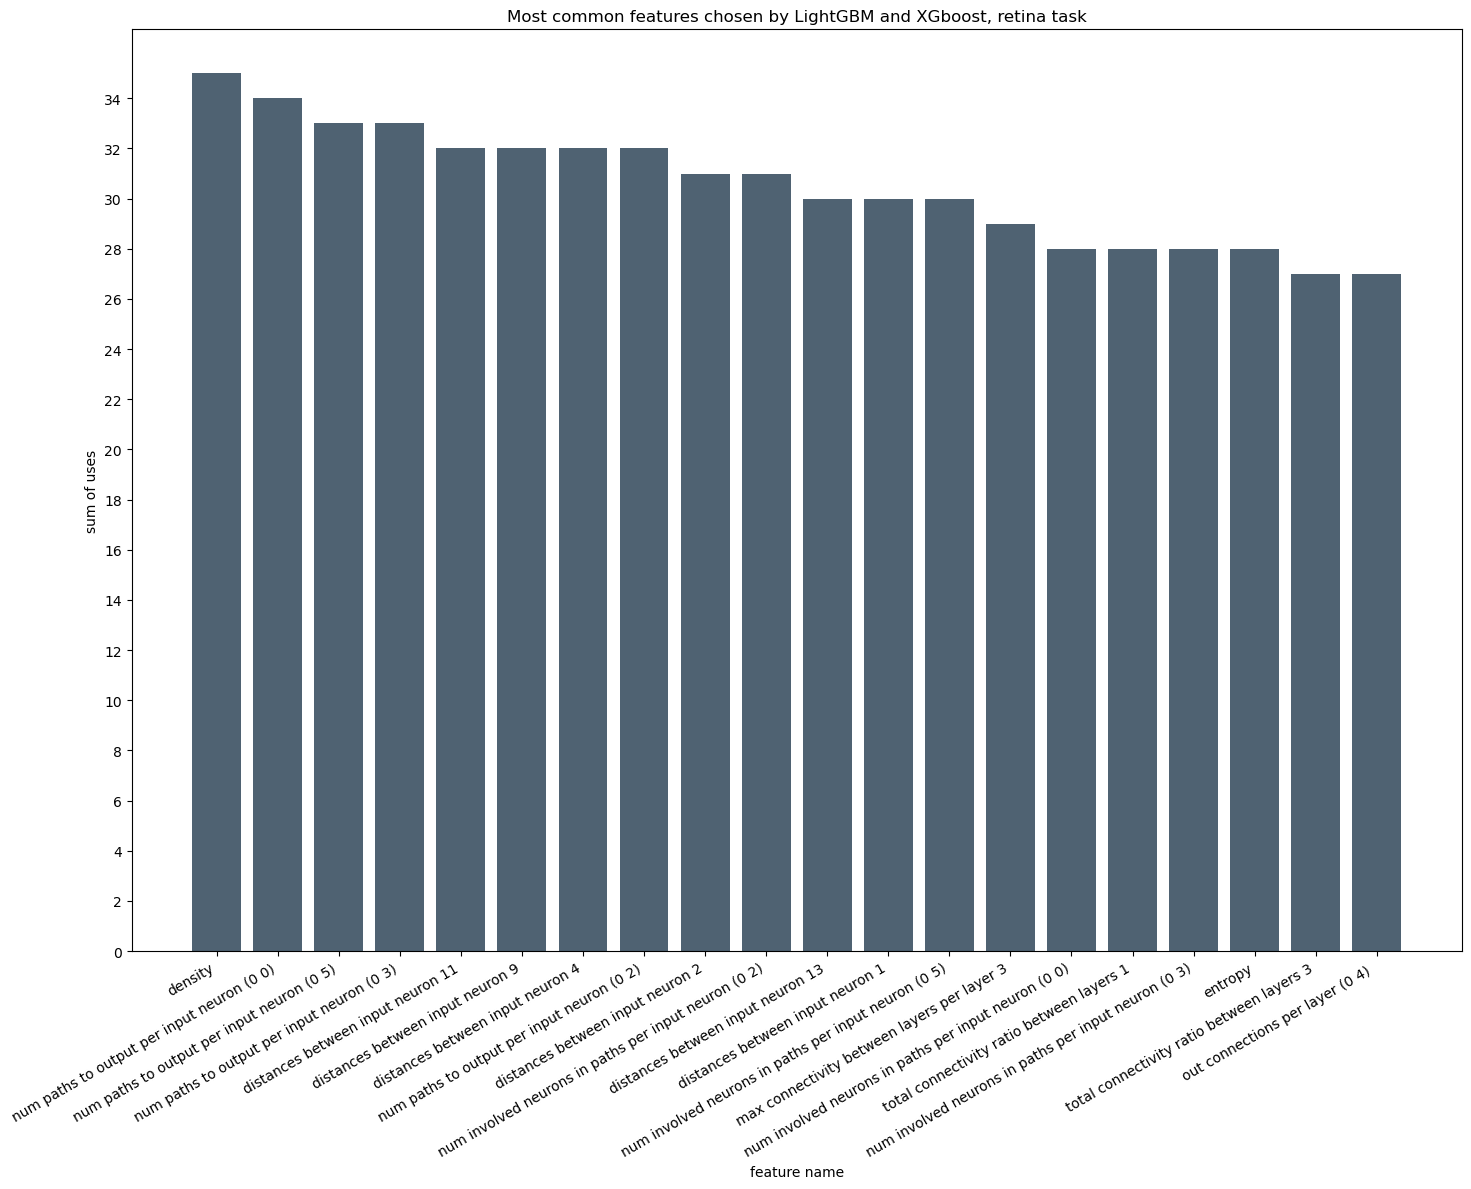

In [22]:
plot_bar_plot_of_used_features(
    sum_uses=all_retina['sum'],
    cut=20,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task=task,
    is_top=True,
    regressor="LightGBM and XGboost"
)

In [42]:
task = 'xor'
used_features_xor_lighgbm_df = pd.read_csv(used_features_csv_path_xor_lighgbm).drop("Unnamed: 0", axis=1).rename(columns={'connectivity_ratio': 'density'})
sum_uses_xor_lighgbm = used_features_xor_lighgbm_df.sum().sort_index().sort_values(ascending=False).rename('lighgbm')
used_features_xor_xgboost_df = pd.read_csv(used_features_csv_path_xor_xgboost).drop("Unnamed: 0", axis=1).rename(columns={'connectivity_ratio': 'density'})
sum_uses_xor_xgboost = used_features_xor_xgboost_df.sum().sort_index().sort_values(ascending=False).rename('xgboost')

In [24]:
all_xors = pd.concat([sum_uses_xor_lighgbm, sum_uses_xor_xgboost], axis=1)
all_xors['sum'] = all_xors.sum(axis=1).sort_index()
all_xors = all_xors.sort_values('sum', ascending=False)

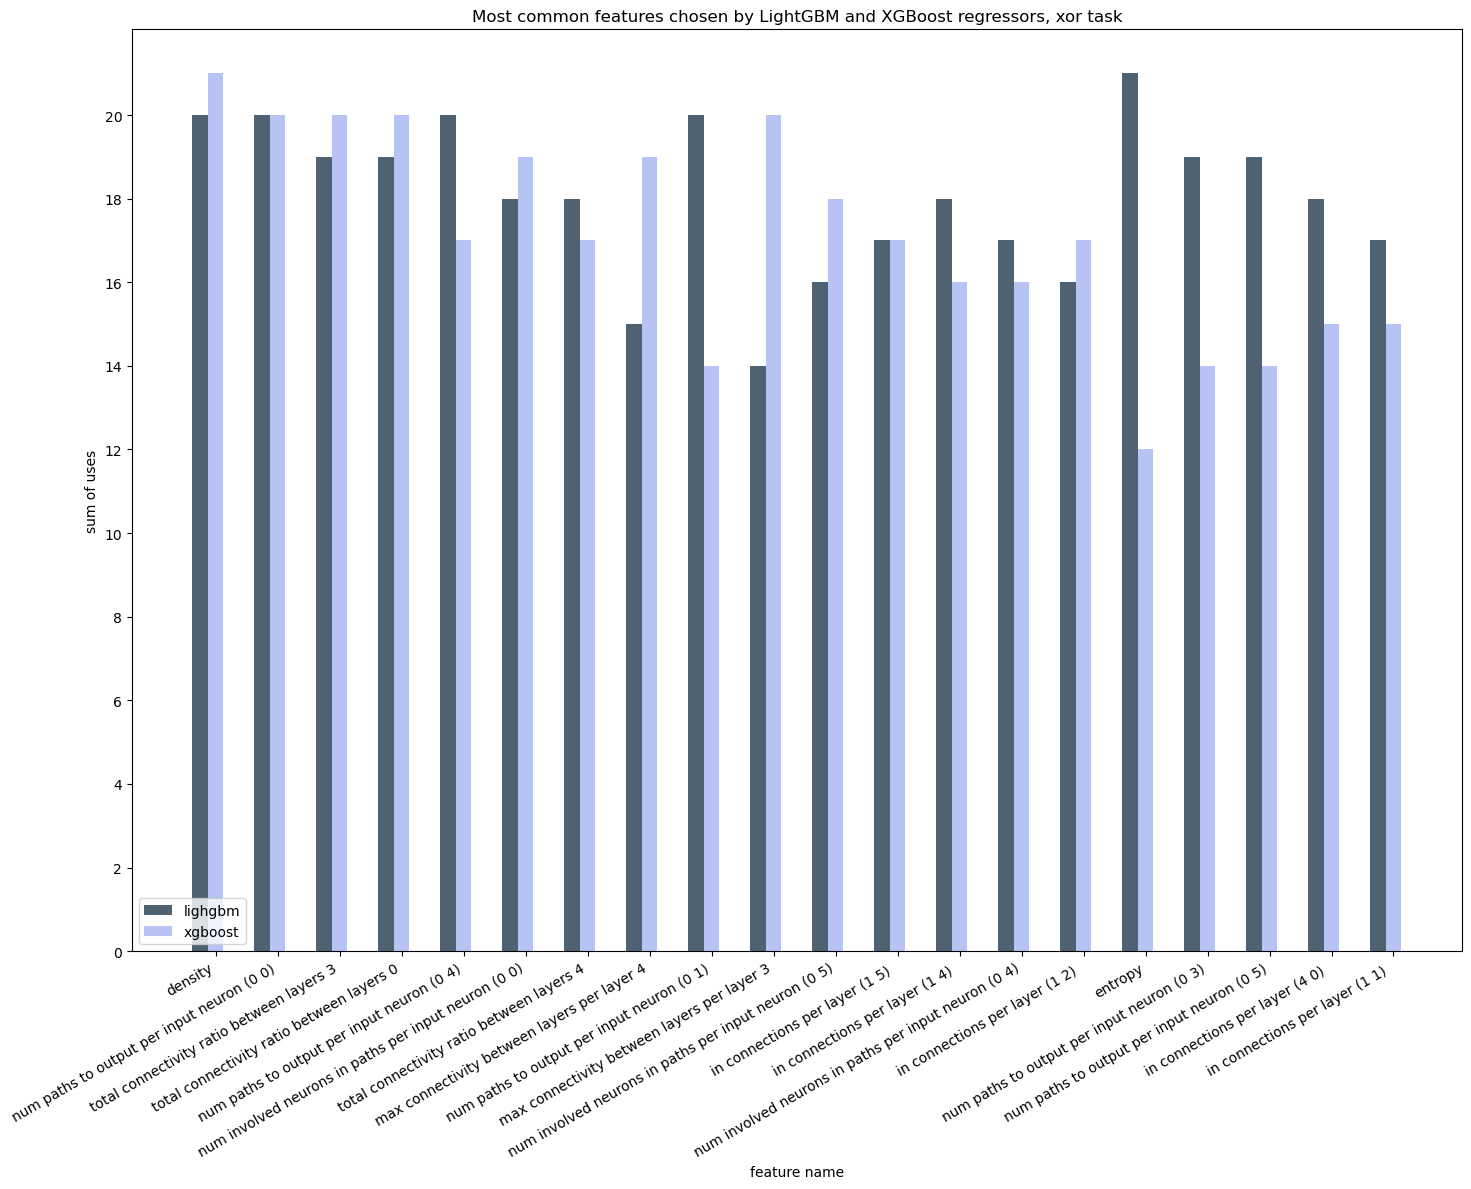

In [25]:
plot_double_bar_plot_of_used_features_different_algos(
    sum_uses=all_xors,
    cut=20,
    is_top=True,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task=task,
)

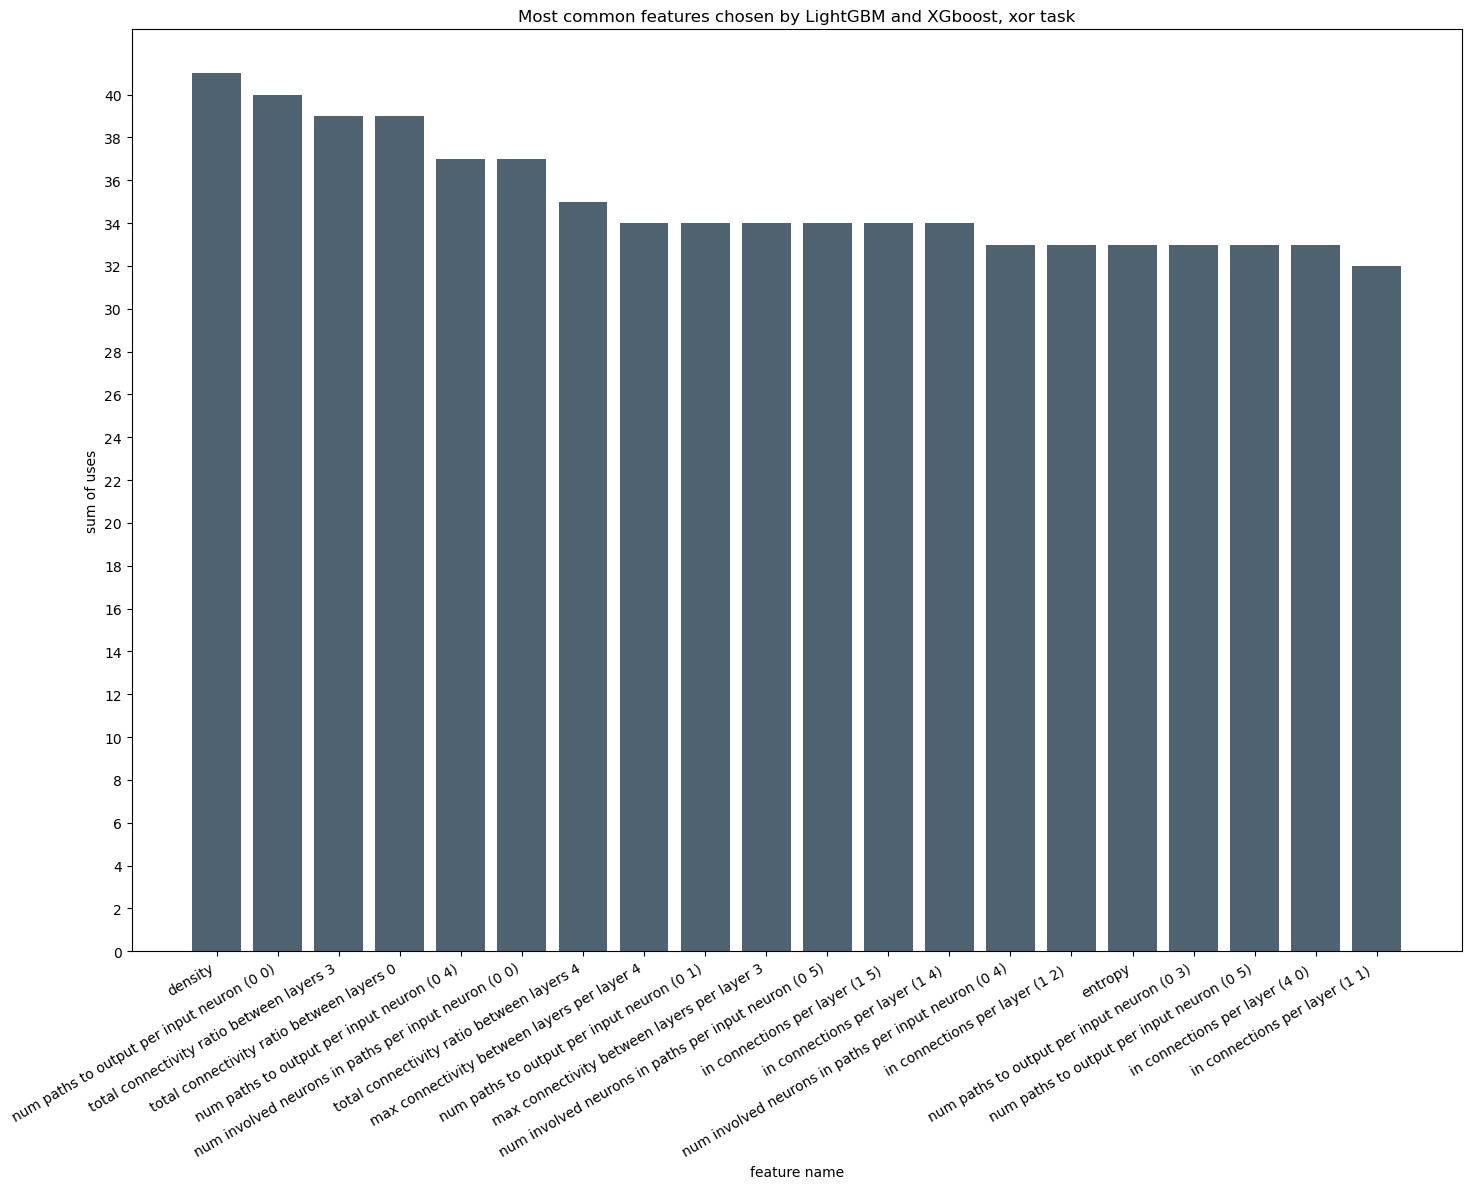

In [26]:
plot_bar_plot_of_used_features(
    sum_uses=all_xors['sum'],
    cut=20,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task=task,
    is_top=True,
    regressor="LightGBM and XGboost"
)

In [27]:
all_xors['normed_xor_sum'] = all_xors['sum'] / all_xors['sum'].max()
all_retina['normed_retina_sum'] = all_retina['sum'] / all_retina['sum'].max()


In [28]:
all = pd.concat([all_xors['normed_xor_sum'].rename('xor'), all_retina['normed_retina_sum'].rename('retina')], axis=1)
all['sum'] = all.sum(axis=1).sort_index()
all = all.sort_values('sum', ascending=False)

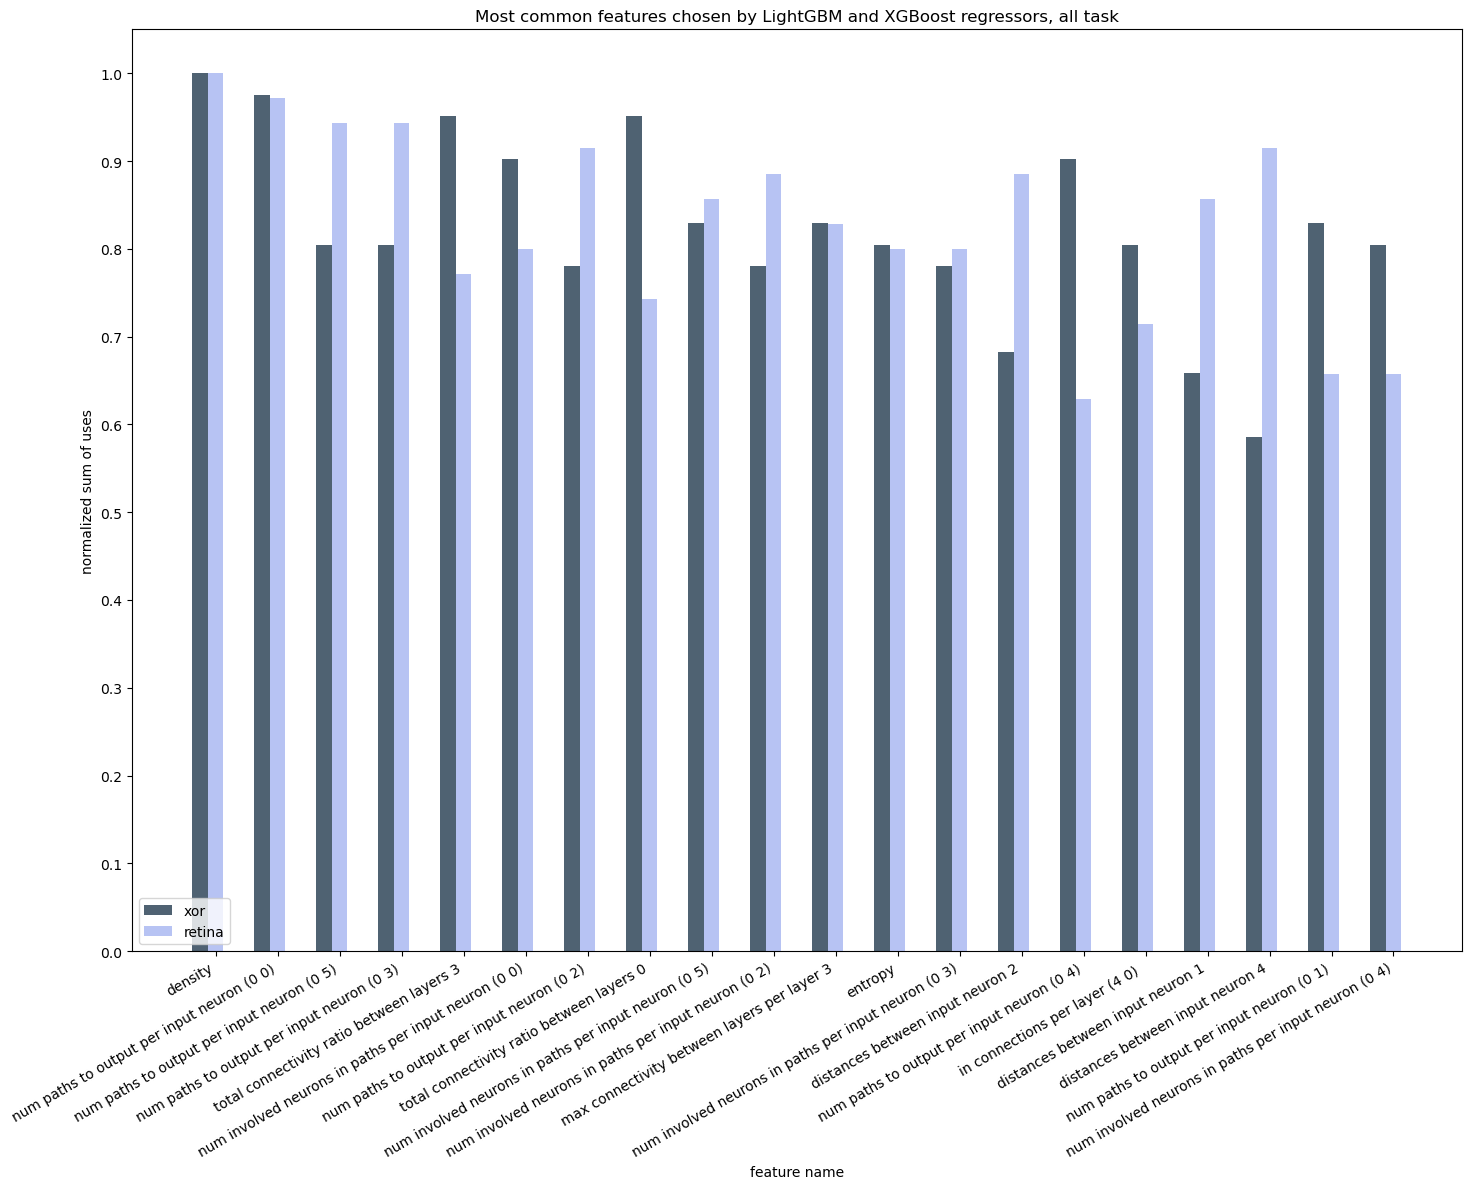

In [29]:
plot_double_bar_plot_of_used_features_different_algos(
    sum_uses=all,
    cut=20,
    is_top=True,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task='all',
    jump = [0.1,0.05],
    is_normalized=True,
)

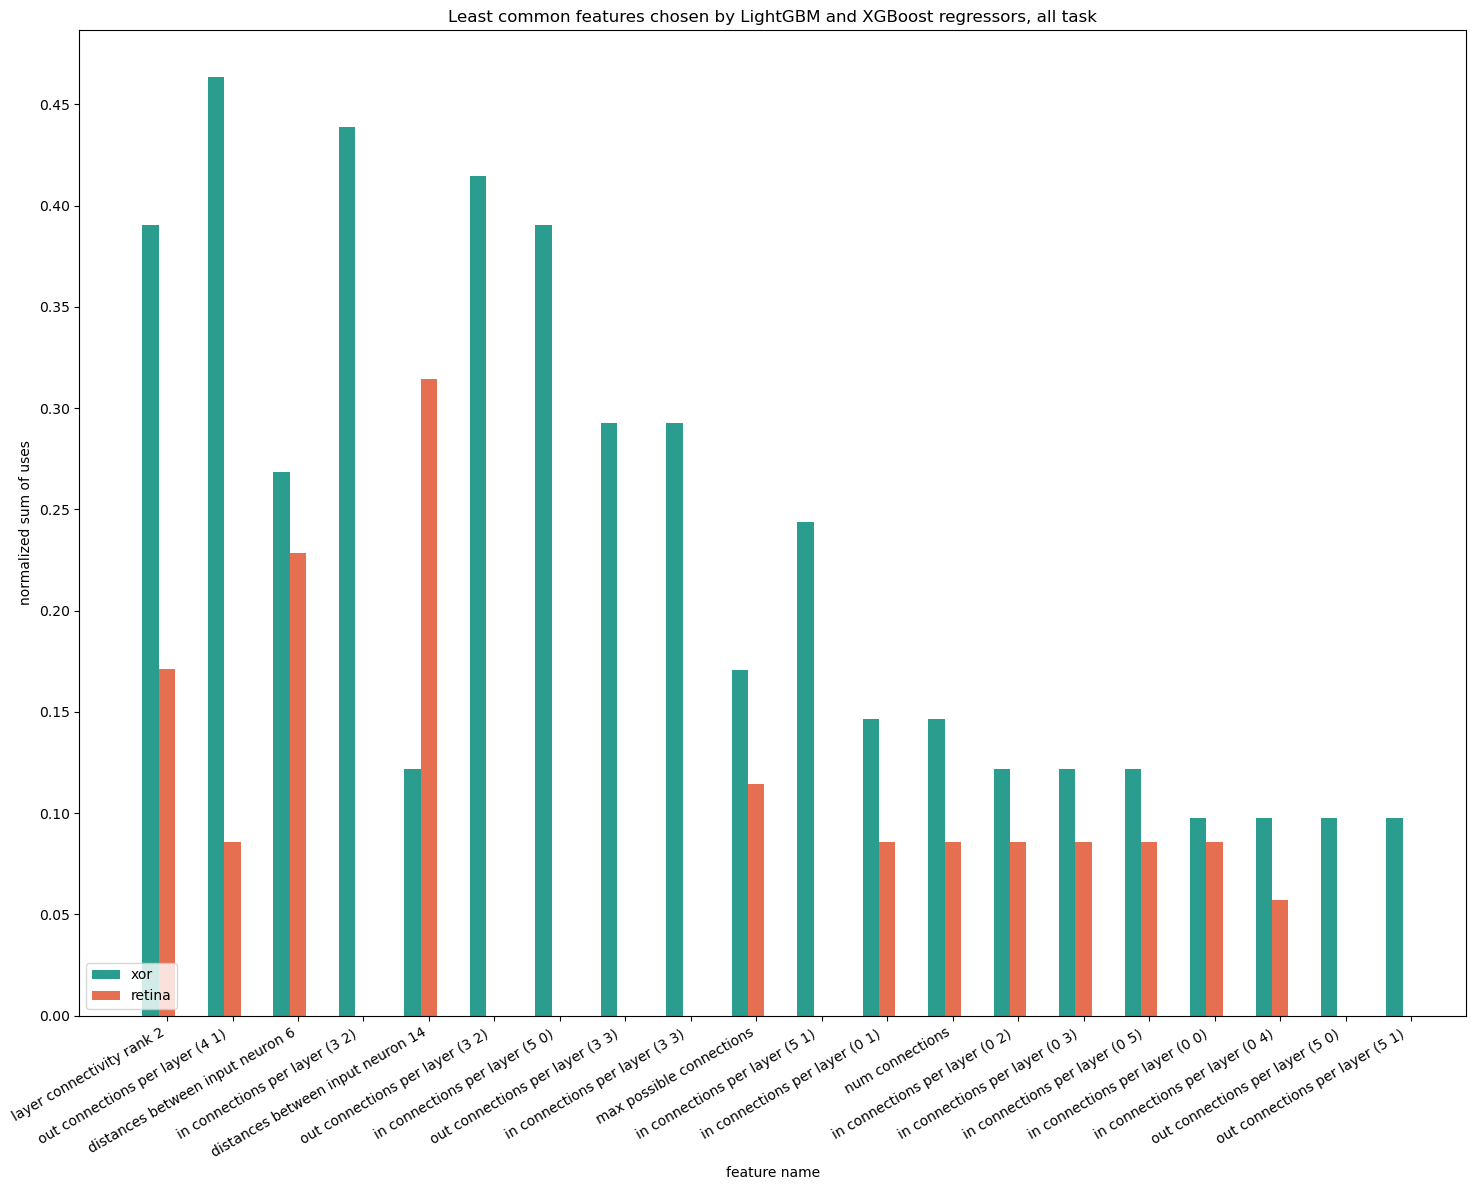

In [30]:
plot_double_bar_plot_of_used_features_different_algos(
    sum_uses=all,
    cut=20,
    is_top=False,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task='all',
    jump = [0.1,0.05],
        is_normalized=True,
)

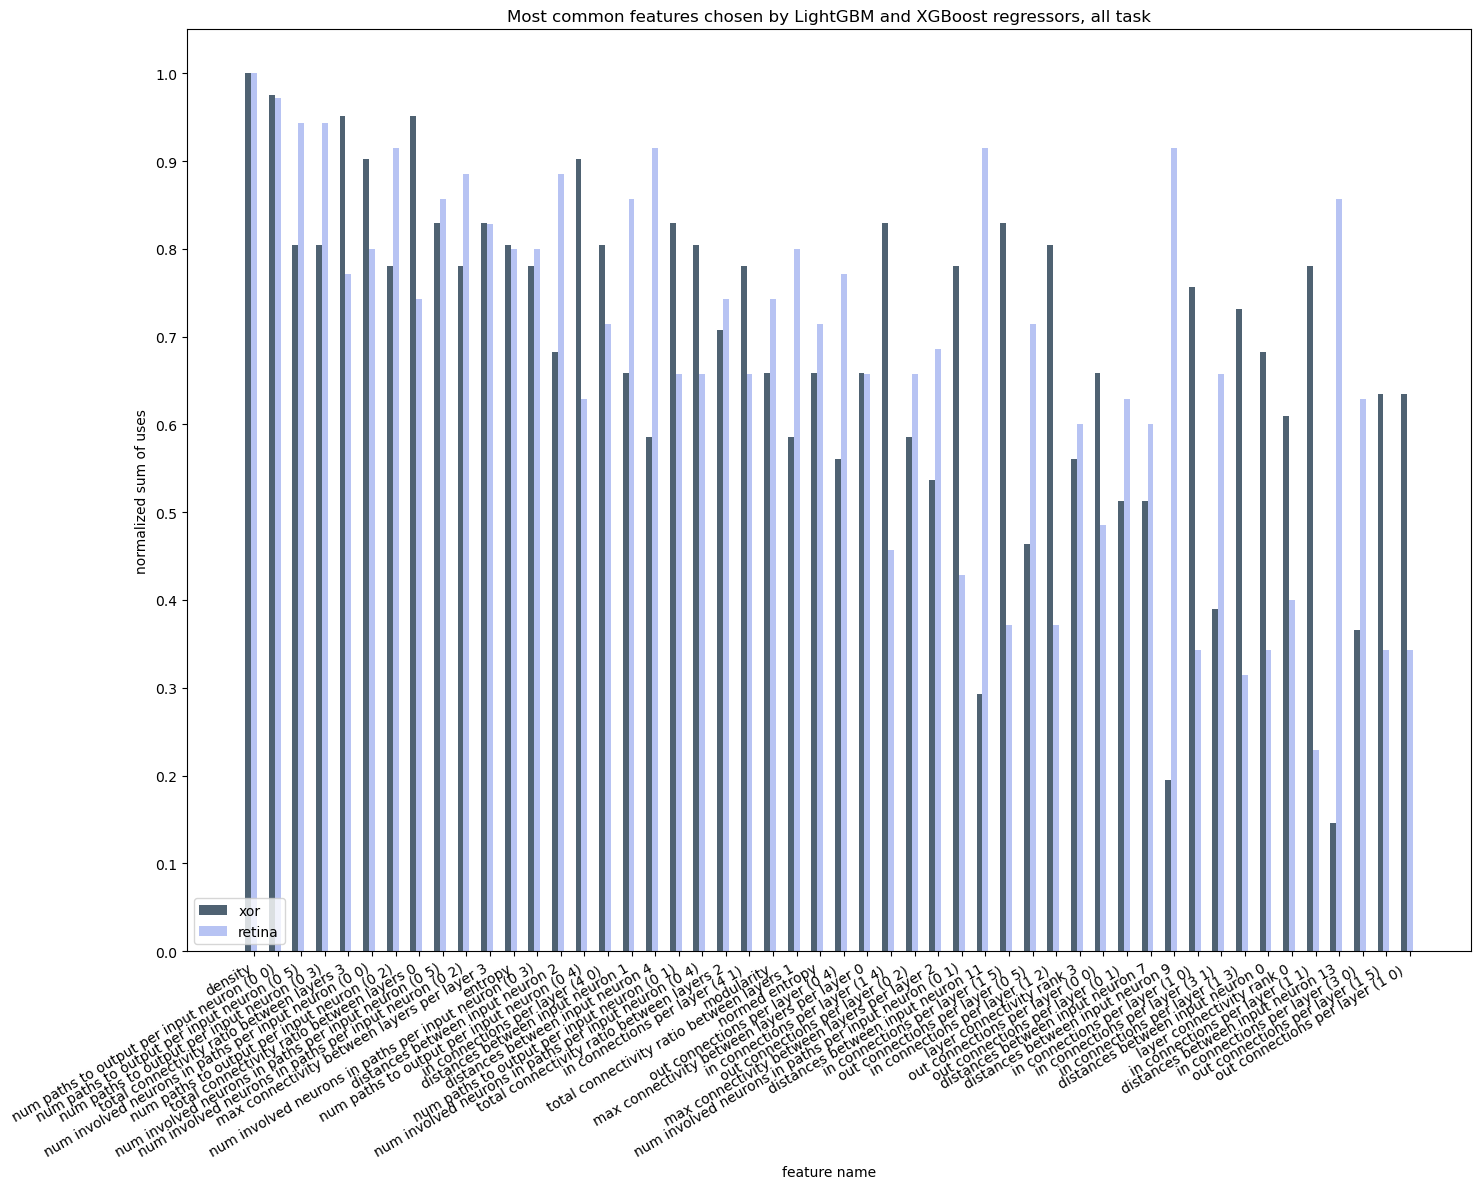

In [31]:
plot_double_bar_plot_of_used_features_different_algos(
    sum_uses=all,
    cut=50,
    is_top=True,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task='all',
    jump = [0.1,0.05],
        is_normalized=True,
)

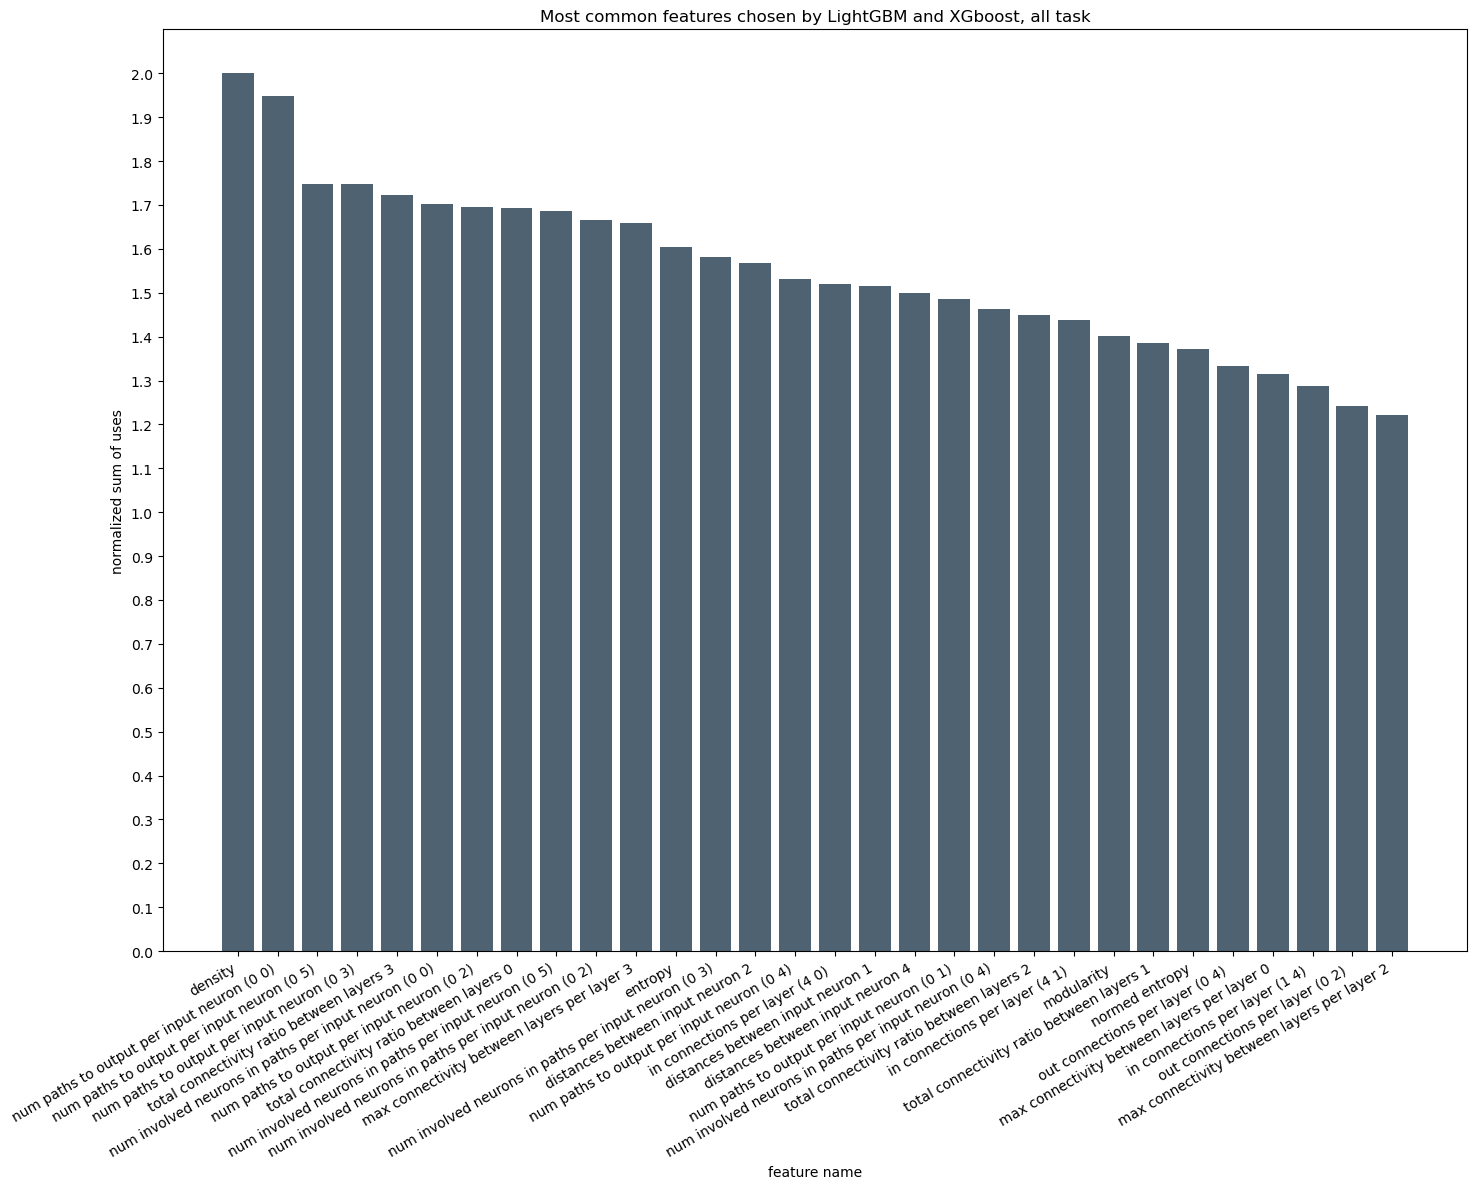

In [32]:
plot_bar_plot_of_used_features(
    sum_uses=all['sum'],
    cut=30,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task="all",
    is_top=True,
    regressor="LightGBM and XGboost",
        jump = [0.1,0.05],
        is_normalized=True,

)

In [68]:
num_features = 20
num_features_used_features = pd.DataFrame()
for df in [
    used_features_xor_lighgbm_df,
    used_features_xor_xgboost_df,
]:
    num_features_used_features = pd.concat([num_features_used_features, df[df.sum(axis=1) == num_features].transpose()], axis=1)

In [69]:
num_features_used_features_sums = num_features_used_features.sum(axis=1).sort_values(ascending=False)
num_features_used_features_sums = num_features_used_features_sums[num_features_used_features_sums>0]

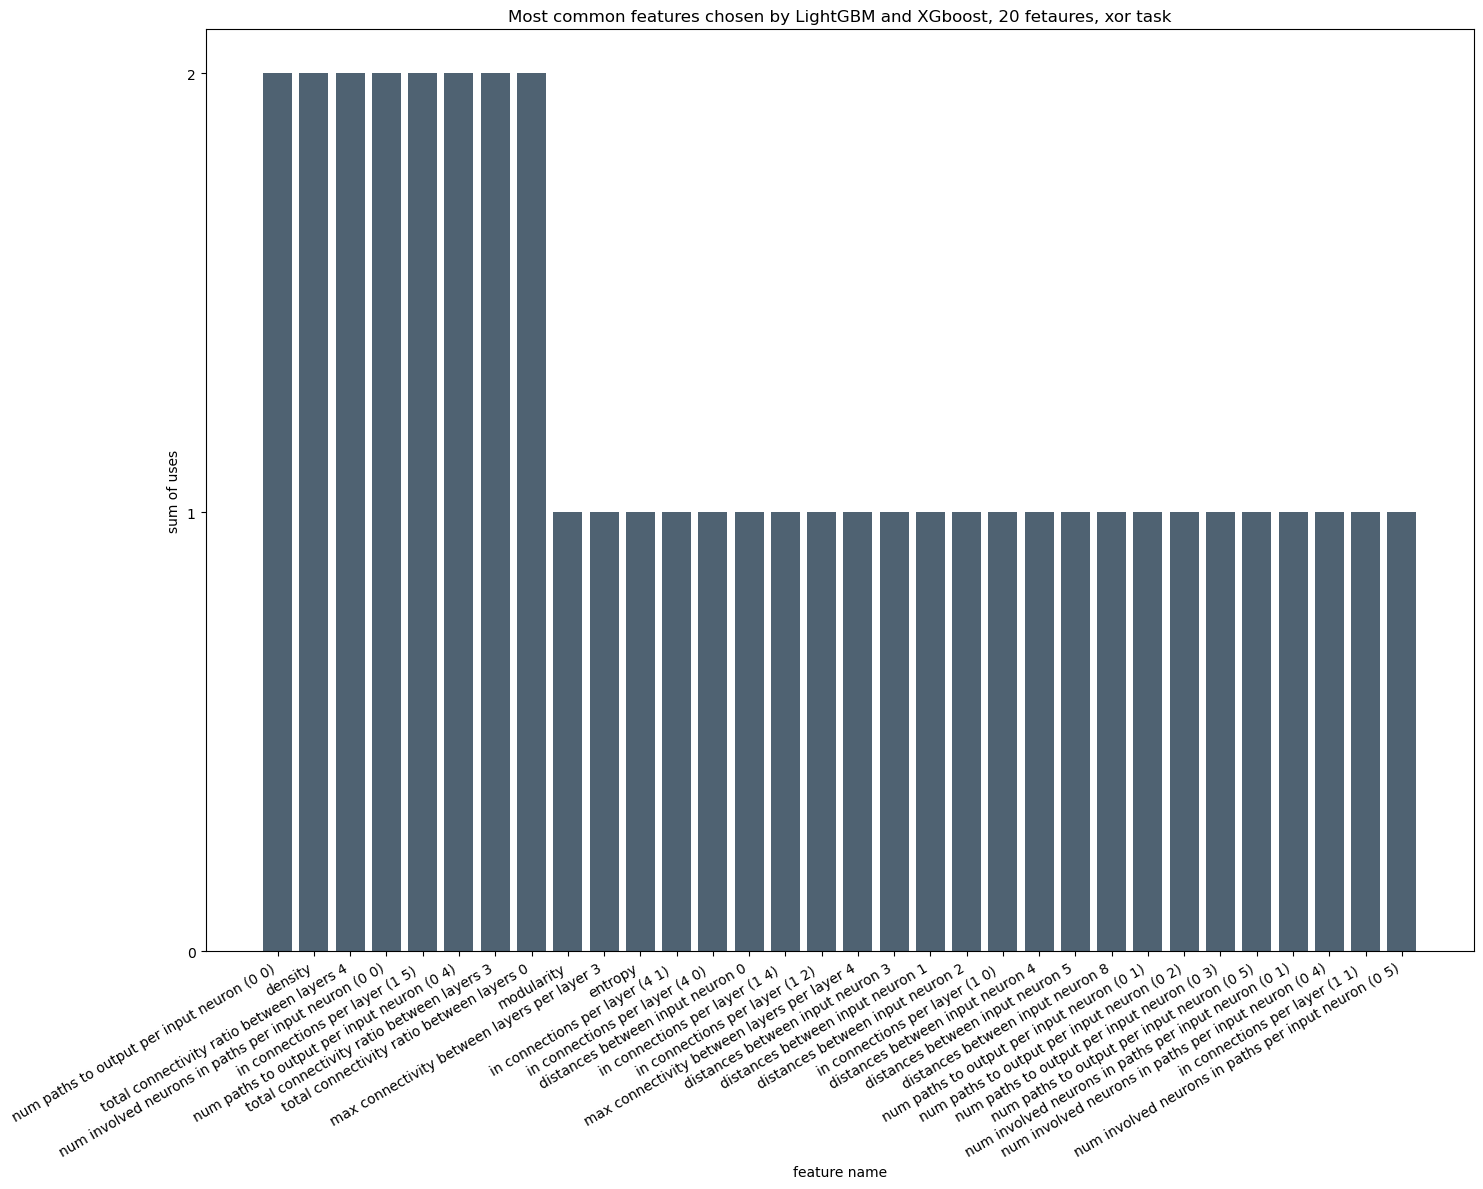

In [70]:
plot_bar_plot_of_used_features(
    sum_uses=num_features_used_features_sums,
    cut=100,
    fig_out_folder=fig_out_folder,
    local_base_path=local_base_path,
    time_str=time_str,
    task="xor",
    is_top=True,
    regressor="LightGBM and XGboost, 20 fetaures",
        jump = [1,1],
        is_normalized=False,

)